In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv("happiness_score_dataset.csv")
df.shape

(158, 12)

This dataframe has 158 rows and 12 column.

In [6]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [12]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

All the columns has appropriate data type. No need to change any of the data type. As we can see from the above table that there is no large difference between the values of different column. So we don't need to scale the data before applying the machine learning algorithm.

In [19]:
df.count()

Country                          158
Region                           158
Happiness Rank                   158
Happiness Score                  158
Standard Error                   158
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         158
Freedom                          158
Trust (Government Corruption)    158
Generosity                       158
Dystopia Residual                158
dtype: int64

There are no missing values in the dataframe.

In [27]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

All the data is already clean.

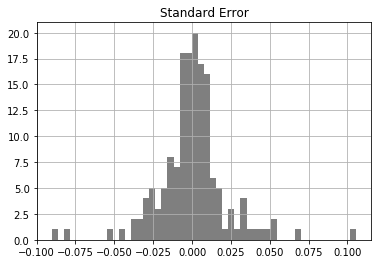

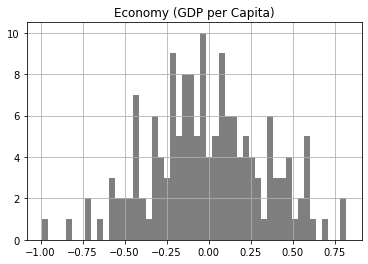

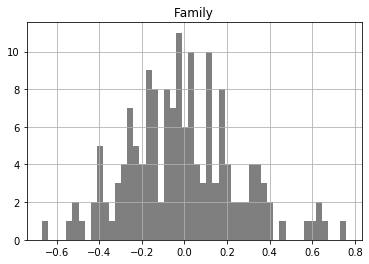

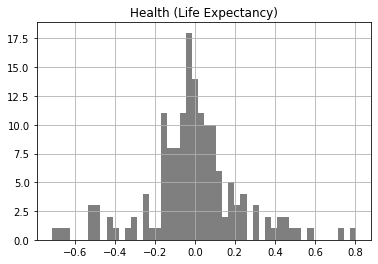

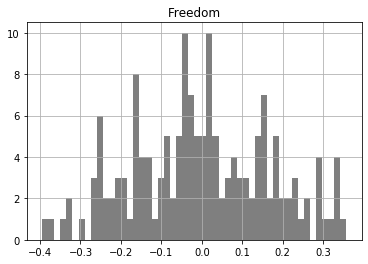

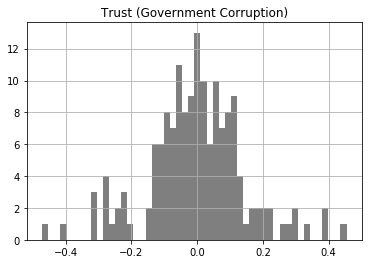

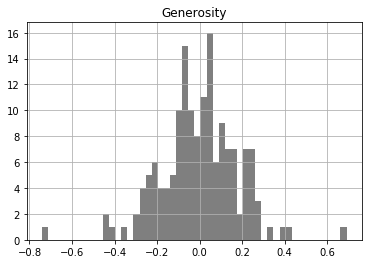

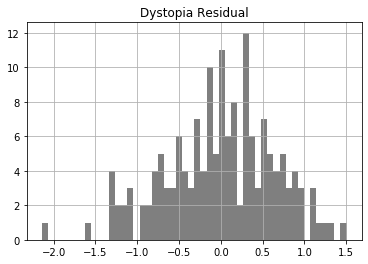

In [42]:
import matplotlib.pyplot as plt
num_df = df.drop(["Country", "Region"], axis = 1)
#plt.figure()
num_feat = ["Standard Error", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity", "Dystopia Residual"]
for i in num_feat:
    plt.figure()
    plt.title(i)
    num_df[i].diff().hist(color='k', alpha=0.5, bins=50)

All the features are normally and symmetriclly distributed.

**checking the outliers**

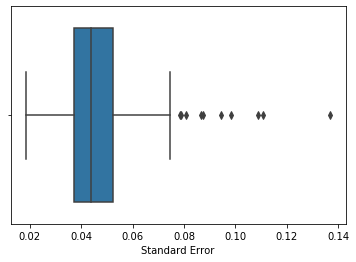

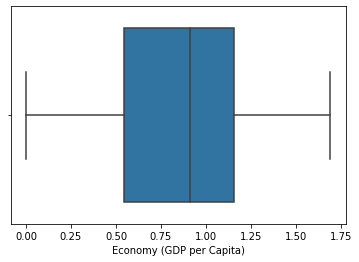

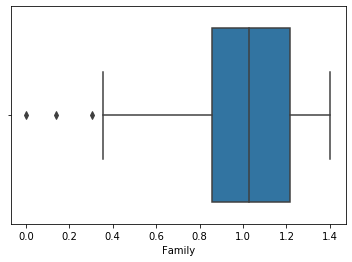

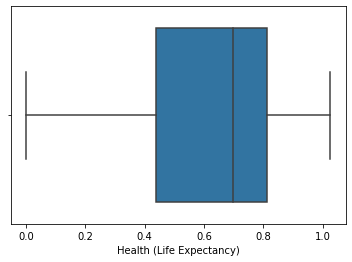

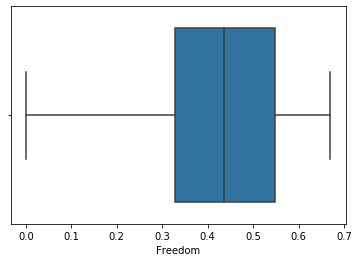

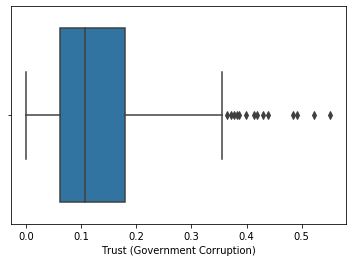

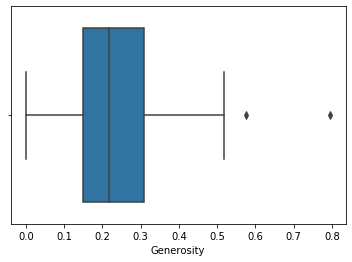

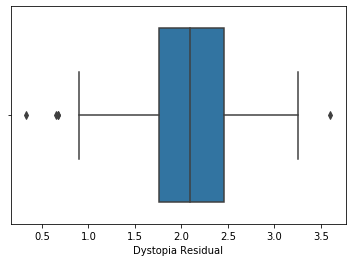

In [48]:
for i in num_feat:
    plt.figure()
    sns.boxplot(x=num_df[i])

There are outliers present in Standard Error, Family, Trust(Government Corruption), Generosity, Dystopia Residual.

In [83]:
df1 = df
for i in num_feat:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (df[i] >= Q1 - 1.5 * IQR) & (df[i] <= Q3 + 1.5 *IQR)
    df1 = df1.loc[filter]
df1.shape

(126, 12)

As we are losing 20% of the data while removing the outliers which is a huge lose of information. So we are not removing the outliers.

**splitting the features and target**

Since only numerical features are useful in this prediction. So we have to remove all the columns having values such as country, happiness ranking.

In [80]:
df1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [84]:
df1.columns
list = ["Country", "Region", "Happiness Rank", "Standard Error"]
df1 = df1.drop(list, axis = 1)

In [86]:
df1.columns

Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Splitting the test and training data with 80% and 20% ratio.

In [91]:
X = df1.drop("Happiness Score", axis = 1)
y = df1["Happiness Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

(100, 7) (26, 7) (100,) (26,)


**Applying the machine learning algorithms**

**1. Linear regression model**

In [95]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Evaluating linear regression model

In [96]:
score = model.score(X_test, y_test)
score

0.9999999163755656

Our linear regression has almost 100% accuracy on test data which is quite good. We also have to do cross validation for this model.

In [103]:
scores = cross_val_score(LR, X_train, y_train, scoring = "r2", cv = 5)
scores

array([0.99999995, 0.99999993, 0.99999981, 0.99999985, 0.99999993])

Again, we are getting almost 100% accureacy in the cross validtaion.

**2 Decision tree model**

In [106]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

In [107]:
DT.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [108]:
DT_score = DT.score(X_test, y_test)
DT_score

0.7493853056206642

In [110]:
scores = cross_val_score(DT, X_train, y_train, scoring = "r2", cv = 5)
scores

array([0.72289024, 0.77304203, 0.77924563, 0.62823892, 0.71954132])

we are getting lesser accuracy in decision tree than linear regression. We can use grid search CV to optimize decision tree.

In [123]:
from sklearn.model_selection import GridSearchCV
param_dict = {
    "random_state":range(1,20),
    "max_depth":range(1,10),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
}
grid_DT = GridSearchCV(DT,
                      param_grid=param_dict,
                      cv = 5,
                      verbose = 1,
                      n_jobs = -1)
grid_DT.fit(X_train, y_train)

Fitting 5 folds for each of 5472 candidates, totalling 27360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 5112 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 13112 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 24312 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 27360 out of 27360 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': r

In [125]:
grid_DT.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'random_state': 1}

creating decision tree with best parameters.

In [130]:
DT_final = DecisionTreeRegressor(max_depth= 9,min_samples_leaf= 1,min_samples_split= 3,random_state= 1)
DT_final.fit(X_train, y_train)
scores = cross_val_score(DT_final,X_train, y_train, scoring = "r2", cv = 5 )
scores

array([0.78806192, 0.79667213, 0.85845536, 0.67542869, 0.80185746])

Accuracy is improve but it is much smaller than the linear regression model.

**3. Random forest model**

In [131]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators = 100)

RF.fit(X_train, y_train)
accuracy = RF.score(X_test, y_test)
accuracy

0.8954487919581042

In [132]:
scores = cross_val_score(RF,X_train, y_train, scoring = "r2", cv = 5 )
scores

array([0.8987703 , 0.88050248, 0.9416932 , 0.84863394, 0.89692223])

In [134]:
param_dict = {
    "n_estimators":range(50,100, 10),
    "max_depth":range(1,10),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
}
grid_RF = GridSearchCV(RF,
                      param_grid=param_dict,
                      cv = 5,
                      verbose = 1,
                      n_jobs = -1)
grid_RF.fit(X_train, y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 16.5min finished


array([0.8987703 , 0.88050248, 0.9416932 , 0.84863394, 0.89692223])

In [136]:
# getting the best parameters
grid_RF.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 80}

In [138]:
#training the random forest with the best parameters
RF_final = RandomForestRegressor(n_estimators = 800, max_depth = 8, min_samples_leaf = 1, min_samples_split = 2)
RF_final.fit(X_train, y_train)
accuracy = RF_final.score(X_test, y_test)
accuracy

0.8920752632467457

In [139]:
scores = cross_val_score(RF_final,X_train, y_train, scoring = "r2", cv = 5 )
scores

array([0.89507375, 0.88628859, 0.9467244 , 0.83074997, 0.90099207])

There is no significant improvement in the model. Still linear regression model is the best model.

**4. Gradient Boost**

In [141]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor(n_estimators = 80)

GB.fit(X_train, y_train)
accuracy = GB.score(X_test, y_test)
accuracy

0.891384068410672

In [142]:
scores = cross_val_score(GB,X_train, y_train, scoring = "r2", cv = 5 )
scores

array([0.89717246, 0.8778423 , 0.94677704, 0.82007159, 0.9130812 ])

In [143]:
param_dict = {
    "n_estimators":range(60,100, 10),
    "max_depth":range(5,10),
    "min_samples_split":range(2,5),
    "min_samples_leaf":range(1,5)
}
grid_GB = GridSearchCV(GB,
                      param_grid=param_dict,
                      cv = 5,
                      verbose = 1,
                      n_jobs = -1)
grid_GB.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   36.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=80,
                                                 n_iter_no...
                            

In [145]:
accuracy = grid_GB.score(X_test, y_test)
accuracy

0.8525821001559011

In [146]:
grid_GB.best_params_

{'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 90}

In [148]:
GB_final = GradientBoostingRegressor(n_estimators = 90, max_depth = 5, min_samples_leaf = 4, min_samples_split = 2)

GB_final.fit(X_train, y_train)
accuracy = GB_final.score(X_test, y_test)
accuracy

0.8527431477919517

In [149]:
scores = cross_val_score(GB_final,X_train, y_train, scoring = "r2", cv = 5 )
scores

array([0.89585349, 0.91369739, 0.94163252, 0.83820547, 0.91703227])

There is no improvement in the accuracy of the model.

**Best model**

By analyzing the accuracy from above, we can conclude that the linear regression is the best model and we can save linear regressor as a pkl file.

In [150]:
import pickle
pickle.dump(LR, open("LR_model.pkl", 'wb'))

Again loading the saved model and using it for prediction.

In [153]:
Saved_LR = pickle.load(open("LR_model.pkl", 'rb'))
score = Saved_LR.score(X_test, y_test)
score

0.9999999163755656